In [1]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


# PyTorch Tensors

## Creating Tensors in PyTorch

Tensors are data structures similar to arrays and matrices. They are used to encode inputs/outputs of a model, as well as their parameters.

Tensors are similar to NumPy's N-dimensional arrays, except that tensors are able to run on GPUs.

In [2]:
# verify correct installation of pytorch
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3606, 0.5936, 0.0026],
        [0.9721, 0.9295, 0.0646],
        [0.7522, 0.1640, 0.4236],
        [0.8514, 0.9367, 0.7771],
        [0.0508, 0.3356, 0.1900]])


### Initializing a tensor - can be done in four ways
1. Directly from Data

In [3]:
# initialize a tensor directly from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

2. From NumPy array

In [4]:
# initialize a tensor from a numpy array
import numpy as np
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.tensor(b)
print(f"Tensor a: {t_a}")
print(f"Tensor b: {t_b}")

Tensor a: tensor([1, 2, 3])
Tensor b: tensor([4, 5, 6], dtype=torch.int32)


3. From another tensor

In [5]:
# initialize a tensor from another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0697, 0.1363],
        [0.4956, 0.4332]]) 



4. With random or constant values

In [6]:
# initialize a tensor with random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4748, 0.8747, 0.3978],
        [0.0099, 0.7181, 0.4711]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### From there, attributes of a tensor can be described (shape, data type, and the device in which they are stored).

In [7]:
# describe tensor attributes
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Manipulating the data type and shape of a tensor

Over 100 operations, including arithmetic, linear algebra, matrix multiplication, and sampling can be done here. Each can be run on a GPU.

We can move tensors to the GPU by using the .to method (after checking for GPU availability). 

In [8]:
# manipulating the data type and shape of a tensor
# change data type of a tensor
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [9]:
# transpose a tensor
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, '-->', t_tr.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


In [10]:
# reshape a tensor from a 1D vector to a 2D vector
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [11]:
# remove unnecessary dimensions (dimensions with size 1 are not needed)
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, '-->', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


## Applying mathematical operations to tensors

In [12]:
# instantiate two random tensors - random distribution [1, 1)
# another with standard normal distribution
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [13]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


### Note that t1 and t2 have the same shape. The product has been calculated as t3.

### It is also possible to calculate mean, sum, and standard deviation along a certain axis (or axes).

In [14]:
# calculate the mean of each column in t1
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [15]:
# calculate the matrix-matrix product between t1 and t2 by transposing t2
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [16]:
# calculate the matrix-matrix product between t1 and t2 by transposing t1 instead
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [17]:
# compute the norm of t1
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [18]:
# compare results with np.sqrt
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### As seen, the results are more or less similar.

## Split, stack, and concatenate tensors

In [19]:
# provide the number of splits in a tensor - even
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

### In the example above, a tensor of size 6 was divided into three tensors of size 2. If the tensor size is not divisible, then the last chunk will be smaller.

In [20]:
# provide sizes of different splits
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

### As seen, the tensor has been split into two groups of sizes 3 and 2, respectively.

In [21]:
# concatenate tensors of sizes 3 and 2 into one
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [22]:
# stack two 1D tensors with the same size to create a 2D tensor
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


# Building input pipelines in PyTorch

When training a deep neural network model, the model is usually trained incremently using iterative optimization algorithm (i.e. stochastic gradient descent).

If the data is too large, for instance, the data is loaded batch by batch. Additionally, a pipeline may be constructed to apply transformation and processing steps to data, such as mean centering, scaling, adding noise to prevent overfitting.

PyTorch provides a special class for constructing efficient/convenient pipelines with Dataset and DataLoader.

## Creating a PyTorch DataLoader from existing tensors

In [23]:
# create a dataset from a list of values from 0 to 5
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [24]:
# iterate through a dataset entry by entry
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [25]:
# create batches from this dataset
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


As seen, two batches of the same size from this dataset has been created.

The drop_last argument is useful for cases when the size is not divisible by the desired batch size by simply setting it to True.

## Combining two tensors into a joint dataset

Data in 2+ tensors are often encountered. Therefore, we would need to build a dataset that combines these tensors. From there, the elements would be retrieved as tuples.

In [26]:
# create two tensors
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [27]:
# create a joint dataset from these two tensors
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

__init__(): is where reading existing arrays, loading files, filtering data happens.

__getitem__(): is where the corresponding sample is returned to the given index.

Then, a joint dataset of t_x and t_y with the custom Dataset class is created.

In [28]:
# create a joint dataset of t_x and t_y
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

In [29]:
# print each example of the joint dataset
for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


In [30]:
# use JointDataset to create a joint dataset instead of using self-defined Dataset class
joint_dataset = TensorDataset(t_x, t_y)

## Shuffle, batch, and repeat

In addition to creating batches, it is possible to shuffle and reiterate over the datasets

In [31]:
# use previous joint dataset to create a shuffled version data loader
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

In [32]:
# iterate through the data loader entry
for i, batch in enumerate(data_loader, 1):
     print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


When training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desired number of epochs.

In [33]:
# iterate over batched dataset twice - 2 epochs
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
         print(f'batch {i}:', 'x:', batch[0], 
                  '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


This results in two different sets of batches.

In the first epoch, the first batch contains a pair of values (y=3, y=2), and the second batch contains a pair of values (y=0, y=1).

In the second epoch, the first batch contains a pair of values(y=0, y=3), and the second batch contains a pair of values(y=2, y=1).

Therefore, for each iteration, the elements within a batch are also shuffled.

## Creating a dataset from files on your local storage disk

It is also possible to build a dataset from files stored on local disk. For this example, there will be six images of cats and dogs in JPEG format.

In [34]:
# examine content of files from directory /home/ac7407/Machine_Learning
import pathlib

imgdir_path = pathlib.Path('/home/ac7407/Machine_Learning')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpeg')])

print(file_list)

['/home/ac7407/Machine_Learning/cat-01.jpeg', '/home/ac7407/Machine_Learning/cat-02.jpeg', '/home/ac7407/Machine_Learning/cat-03.jpeg', '/home/ac7407/Machine_Learning/dog-01.jpeg', '/home/ac7407/Machine_Learning/dog-02.jpeg', '/home/ac7407/Machine_Learning/dog-03.jpeg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


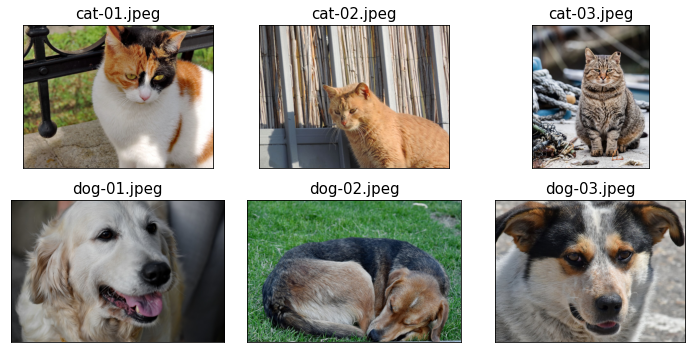

In [35]:
# visualize images using matplotlib
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

Since some of the images have different aspect ratios, we should preprocess these images to a consistent size.

In [36]:
# extract labels from list of filenames and assign 1 to dogs and 0 to cats
labels = [1 if 'dog' in
         os.path.basename(file) else 0
         for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [37]:
# create a joint dataset from two arrays
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

/home/ac7407/Machine_Learning/cat-01.jpeg 0
/home/ac7407/Machine_Learning/cat-02.jpeg 0
/home/ac7407/Machine_Learning/cat-03.jpeg 0
/home/ac7407/Machine_Learning/dog-01.jpeg 1
/home/ac7407/Machine_Learning/dog-02.jpeg 1
/home/ac7407/Machine_Learning/dog-03.jpeg 1


In [38]:
# resize to 80x120 and convert loaded pixels into tensors
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

In [39]:
# update ImageDataset class with the transform defined
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

/home/ac7407/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


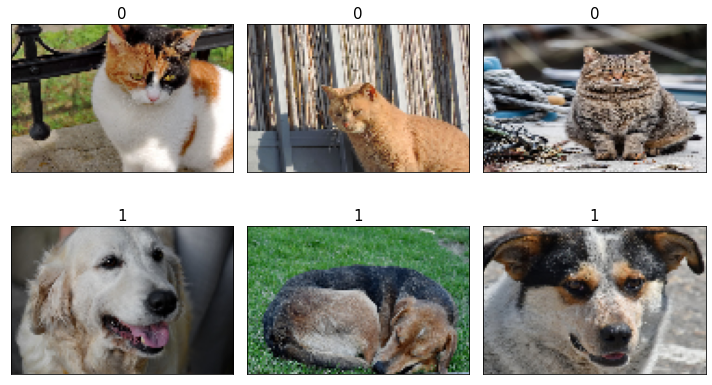

In [40]:
# visualize transformed image examples with matplotlib
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

The __getitem__ method in the ImageDataset class wraps all four steps into a single function.
- Loading of raw content (images and labels)
- Decoding the images into tensors
- Resizing images
- Returning dataset to iterate over and apply other operations (i.e. shuffling and batching)

## Fetching available datasets from the torchvision.datasets library

This library provides a collection of freely available images for training or evaluating deep learning models.

The examples will cover fetching MNIST. (celeba exceeded disk quota on HPC)

In [41]:
# retrieve MNIST dataset and train neural network to read images
import torchvision

image_path = '/home/ac7407/Machine_Learning/'

mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x145A35E6A6D0>, 5)


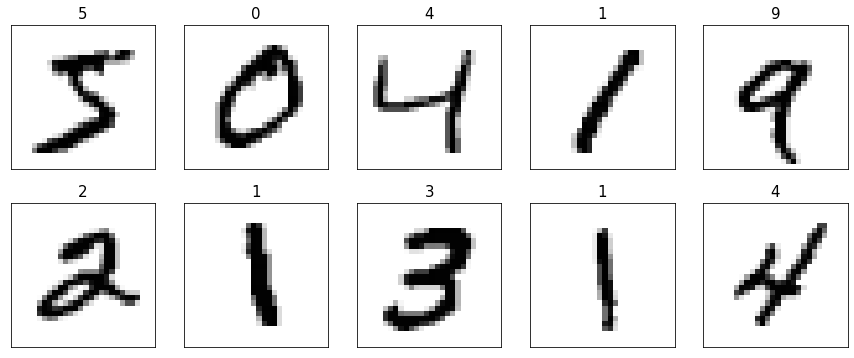

In [42]:
# plot figures of 0-9 digits
from itertools import islice
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()

# Building an NN model in PyTorch

Implement first predictive model in PyTorch with a simple linear regression model.

## The PyTorch neural network module (torch.nn)

torch.nn helps create and train NNs by allowing easy prototyping and building of complex models in just a few lines of code.

First, a linear regression model will be trained using nothing but the basic PyTorch tensor operations.

Then, features from torch.nn and torch.optim will be added incrementally. Also, the detaset pipeline functionalities (Dataset and DataLoader) will be used too.

Through nn.Module, building an NN in PyTorch can be done by stacking layers to form a network.

## Building a linear regression model

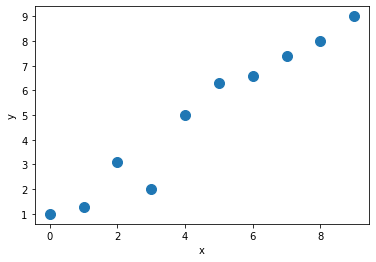

In [43]:
# create a toy dataset in numpy and visualize it
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 
                     6.3, 6.6,7.4, 8.0,
                     9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [44]:
# standardize the features (mean centering / standard deviation)
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_d1 = DataLoader(train_ds, batch_size, shuffle=True)

DataLoader batch size has been set to 1.

Now, the model for linear regression can be defined as z = wx + b.

Using the torch.nn module, we can begin defining a model.

Here, a linear regression model will be defined from scratch. Parameters such as weight an bias will also be defined. Lastly, the model() function determines how the NN will use the input data to generate output.

In [45]:
# define model function to use input data to generate output
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias

In [46]:
# define loss function we want to minimize to find optimal model weights
# use mean squared error as loss function
def loss_fn(input, target):
    return (input-target).pow(2).mean()

Stochastic gradient descent will be used to learn the weight parameters of the model. 

First, we need to compute the gradients using torch.autograd.backward() function.

In [47]:
# set learning rate = 0.001, num_epochs = 200, log_epochs = 10
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_d1:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 41.2725
Epoch 10 Loss 24.4285
Epoch 20 Loss 1.0575
Epoch 30 Loss 15.1630
Epoch 40 Loss 12.5989
Epoch 50 Loss 5.0840
Epoch 60 Loss 0.7865
Epoch 70 Loss 3.7489
Epoch 80 Loss 2.4036
Epoch 90 Loss 0.4430
Epoch 100 Loss 1.1155
Epoch 110 Loss 1.3195
Epoch 120 Loss 0.1064
Epoch 130 Loss 0.5676
Epoch 140 Loss 0.2216
Epoch 150 Loss 1.4862
Epoch 160 Loss 0.0483
Epoch 170 Loss 0.0061
Epoch 180 Loss 0.0016
Epoch 190 Loss 0.0294


Final Parameters: 2.645277738571167 4.715577602386475


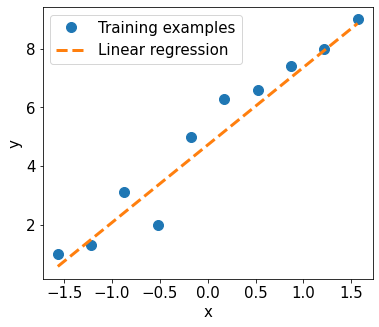

In [48]:
# plot trained model
print('Final Parameters:', weight.item(), bias.item())
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear regression'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

As seen from above, the linear regression fits the data well.

## Model training via the torch.nn and torch.optim modules

The problem with writing the loss function and gradient descent updates could be repetitive. Therefore, we can use the torch.nn and torch.optim modules to help automate these tasks.

In [49]:
# create a new MSE loss function and stochastic gradient descent optimizer
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [50]:
# call step() method of optimizer to train the model
for epoch in range(num_epochs):
    for x_batch, y_batch in train_d1:
        # 1. generate predictions
        pred = model(x_batch)[:, 0]
        # 2. calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. compute gradients
        loss.backward()
        # 4. update parameters using gradient descent
        optimizer.step()
        # 5. reset gradients to zero
        optimizer.zero_grad()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6684
Epoch 10 Loss 29.1377
Epoch 20 Loss 20.9207
Epoch 30 Loss 0.1257
Epoch 40 Loss 12.4922
Epoch 50 Loss 1.7845
Epoch 60 Loss 7.6425
Epoch 70 Loss 2.5606
Epoch 80 Loss 0.0157
Epoch 90 Loss 0.7548
Epoch 100 Loss 0.8412
Epoch 110 Loss 0.4923
Epoch 120 Loss 0.0823
Epoch 130 Loss 0.0794
Epoch 140 Loss 0.0891
Epoch 150 Loss 0.0973
Epoch 160 Loss 0.1043
Epoch 170 Loss 0.1103
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0764


In [51]:
# obtain weight and bias params
print('Final Parameters:', model.weight.item(), model.bias.item())

Final Parameters: 2.6496422290802 4.87706995010376


Comparing with the previous method, the params for weight and bias are roughly similar.

## Building a multilayer perceptron for classifiying flowers in the Iris dataset

PyTorch provides already defined layers through torch.nn that can be readily used as building blocks for a NN model. 

In this section these layers will be used to solve a classification task using the Iris flower dataset where it will learn to identify three species of irises and build a two-layer perceptron using torch.nn module.

In [52]:
# obtain Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=1./3, random_state=1)

/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


100 samples have been randomly selected where 2/3 for training and 50 samples (1/3) for testing.

In [53]:
# standardize the features (mean centering / standard deviation)
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Batch size has been set to 2 for DataLoader.

For the purpose of this problem, the Linear layer (i.e. fully connected layer or dense layer) will be used and it is best represented by f(w * x * b), where x represents a tensor containing the input features, w and b are the weight matrix and bias vector, and f is the activation function.

Each layer in an NN receives its inputs from the previous layer, therefore its dimensionality (rank and shape) is fixed. In this case, we want to define a model with two hidden layers. The first one will recieve and input of four features and projects them to 16 neurons. The second layer will recieve the output of the previous layer and projects them to three output neurons (since there are three class labels).

In [54]:
# set up a neural network with two hidden layers
# hidden_size = 16, output_size = 3
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

The sigmoid activation function was used for the first layer and softmax activation was used for the output layer.

Next, the loss function is specified as a cross-entropy loss and the optimizer as Adam, a robust gradient-based optimization method.

In [55]:
# specify loss function as cross-entropy loss and optimizer as Adam
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [56]:
# train model, num_epochs = 100
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

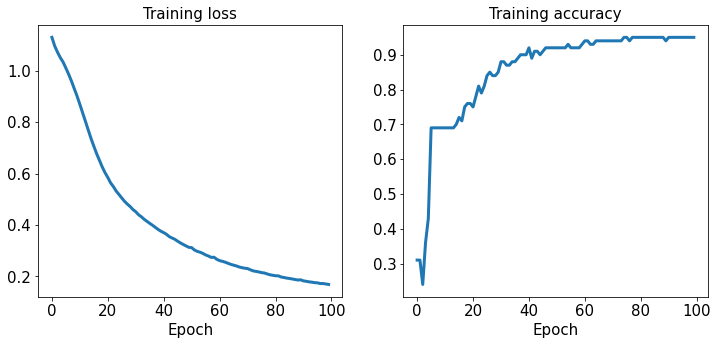

In [57]:
# visualize learning curve
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## Evaluating the trained model on the test dataset

In [58]:
# evaluate classification accuracy of trained model on test dataset
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9800


## Saving and reloading the trained model

Trained models can be saved on disk for future use.

In [59]:
# save trained model
path = 'iris_classifier.pt'
torch.save(model, path)

In [60]:
# reload trained model
model_new = torch.load(path)

In [61]:
# verify model architecture
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [62]:
# evaluate the reloaded model on test dataset to verify results
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9800


If you want to just save the learned parameters, do the following:

In [63]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

However, in order to reload the saved parameters, the model will have to be constructed first before the loaded parameters can be feeded into it.

In [64]:
# construct model then load saved parameters
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

# Choosing activation functions for multilayer neural networks

## Logistic Function Recap
A logistic function is a type of mathematical function with a sigmoidal curve. It is commonly used to model phenomena that exhibit logistic growth, where it initially increases rapidly but eventually slows down as a limiting factor is reached. It is also used in machine learning as an activation function in artificial neural networks.

Thus, an activation function is applied to the output of a neuron in a neural network. It takes the weighted sum of the input data and the bias of the neuron and produces an output value.

In [65]:
# model a logistic function with numpy
import numpy as np
X = np.array([1, 1.4, 2.5]) # first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)
print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


This value tells us that there is an 88.8% probability that a particular sample 'x' belongs to the positive class.

In [66]:
# demonstrate that an output layer consisting of multiple logistic activation units does not produce meaningful probability values
# W: array with shape = (n_output_units, n_hidden_units+1)
# note that the first column is the bias units
W = np.array([[1.1, 1.2, 0.8, 0.4],
             [0.2, 0.4, 1.0, 0.2],
             [0.6, 1.5, 1.2, 0.7]])
# A: data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1
A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)
print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.856 0.681 0.839]


In [67]:
# use the maximum value to predict the class label
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class)

Predicted class label: 0


## Estimating class probabilities in multiclass classification via the softmax function
Softmax Functions are generally used for multi-class classification problems and returns a probability distribution over the classes.

In [68]:
# define a softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
y_probas = softmax(Z)
print("Probabilities:\n", y_probas)
np.sum(y_probas)

Probabilities:
 [0.447 0.161 0.392]


1.0

In [69]:
# use torch.softmax() activation function in pytorch
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

## Broadening the output spectrum using a hyperbolic tangent
Hyperbolic tangent function is sometimes preferred over the logistic function because of several advantages:
- zero-centered output: when the mean of the output is close to zero, this can be useful in deep learning models as it can help with training stability and convergence
- stronger gradients: enables faster learning and better gradient optimization in neural network
- better suited for the range of weights: output range of -1 to 1 is better suited

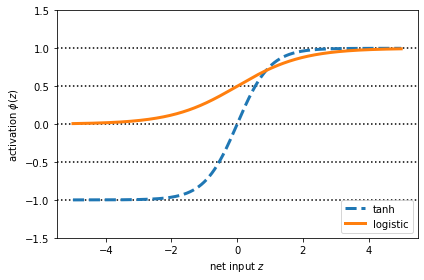

In [70]:
# compare logistic function and tanh function
import matplotlib.pyplot as plt
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
          linewidth=3, linestyle='--',
          label='tanh')
plt.plot(z, log_act,
          linewidth=3,
          label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

As seen from above, the tanh function has double the output space of the logistic function.

In [71]:
# use numpy's tanh function to build NN model
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [72]:
# compare results with torch.tanh(x) 
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [73]:
# demonstrate logistic function using scipy.special module
from scipy.special import expit
expit(z)

array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [74]:
# compare results using torch.sigmoid()
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

## Rectified linear unit activation
This is a widely used activation function in neural networks. It is a piecewise linear function that returns the input if it is positive and 0 if it is negative. 

Its advantages are as follows:
- Simplicity: computationally efficient and easy to use
- Non-linearity: allows NN to learn more complex and sophisticated patterns from the input data
- Sparsity: useful in reducing overfitting and improving generalization performance

In [75]:
# apply ReLU activation function using pytorch
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)